**Machine Learning with Sci-Kit Learn Tutorial**

Prerequisites:
- Basic Pandas knowledge
- Understanding of Machine Learning Principles

What will be covered
- Exploratory data analysis
- Training and testing set partition
- Machine learning models
- Model evaluation

This tutorial will cover some basic machine learning models, others can be found on the sklearn website and applied using the same formula

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

#allows graphs to show in our notebook
%matplotlib inline 

Pandas is a standard dataframe manipulation library (http://pandas.pydata.org/)
Matplotlib is the standard visualization and plotting library (https://matplotlib.org/)
Seaborn simplifies some of the matplotlib visualizations (https://seaborn.pydata.org/)

**Exploratory Data Analysis**

Import the data into a dataframe "iris"

In [2]:
iris = pd.read_csv('iris.csv')
iris.drop("Id", axis=1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
set(iris.Species)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

The IRIS dataset is a classic dataset that is used to test machine learning models.  We will be using several models to predict the species field based on the four measurement fields.

Let's look at the distribution of each field to see if there are any irregularities

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


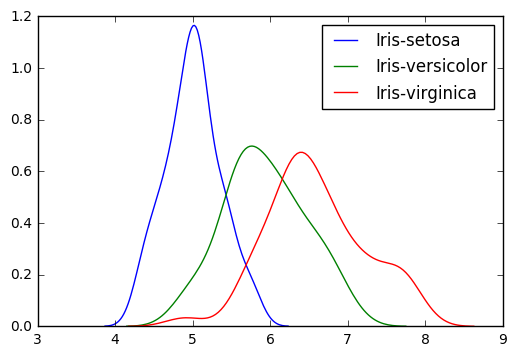

In [4]:
sns.kdeplot(iris.SepalLengthCm[iris.Species == 'Iris-setosa'], label='Iris-setosa');
sns.kdeplot(iris.SepalLengthCm[iris.Species == 'Iris-versicolor'], label='Iris-versicolor');
sns.kdeplot(iris.SepalLengthCm[iris.Species == 'Iris-virginica'], label='Iris-virginica');

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


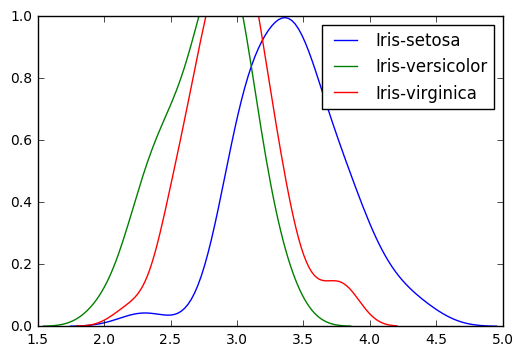

In [5]:
sns.kdeplot(iris.SepalWidthCm[iris.Species == 'Iris-setosa'], label='Iris-setosa');
sns.kdeplot(iris.SepalWidthCm[iris.Species == 'Iris-versicolor'], label='Iris-versicolor');
sns.kdeplot(iris.SepalWidthCm[iris.Species == 'Iris-virginica'], label='Iris-virginica');

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


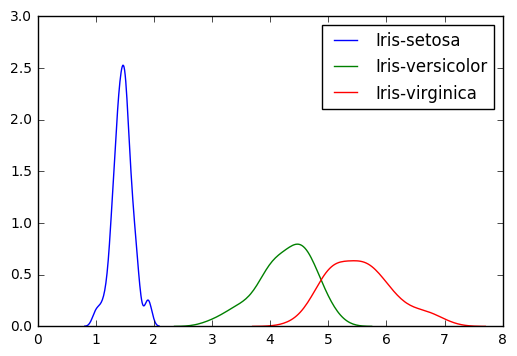

In [6]:
sns.kdeplot(iris.PetalLengthCm[iris.Species == 'Iris-setosa'], label='Iris-setosa');
sns.kdeplot(iris.PetalLengthCm[iris.Species == 'Iris-versicolor'], label='Iris-versicolor');
sns.kdeplot(iris.PetalLengthCm[iris.Species == 'Iris-virginica'], label='Iris-virginica');

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


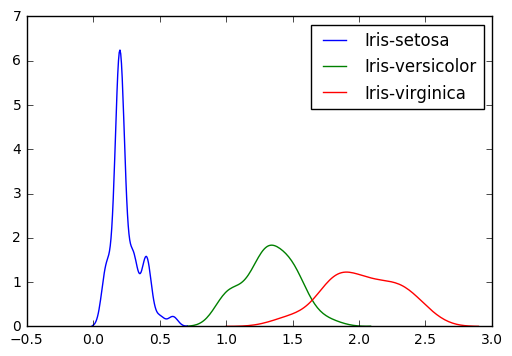

In [7]:
sns.kdeplot(iris.PetalWidthCm[iris.Species == 'Iris-setosa'], label='Iris-setosa');
sns.kdeplot(iris.PetalWidthCm[iris.Species == 'Iris-versicolor'], label='Iris-versicolor');
sns.kdeplot(iris.PetalWidthCm[iris.Species == 'Iris-virginica'], label='Iris-virginica');

It looks like Petal related information is highly informative of 'Iris-setosa'

What are the relationships between the variables?

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


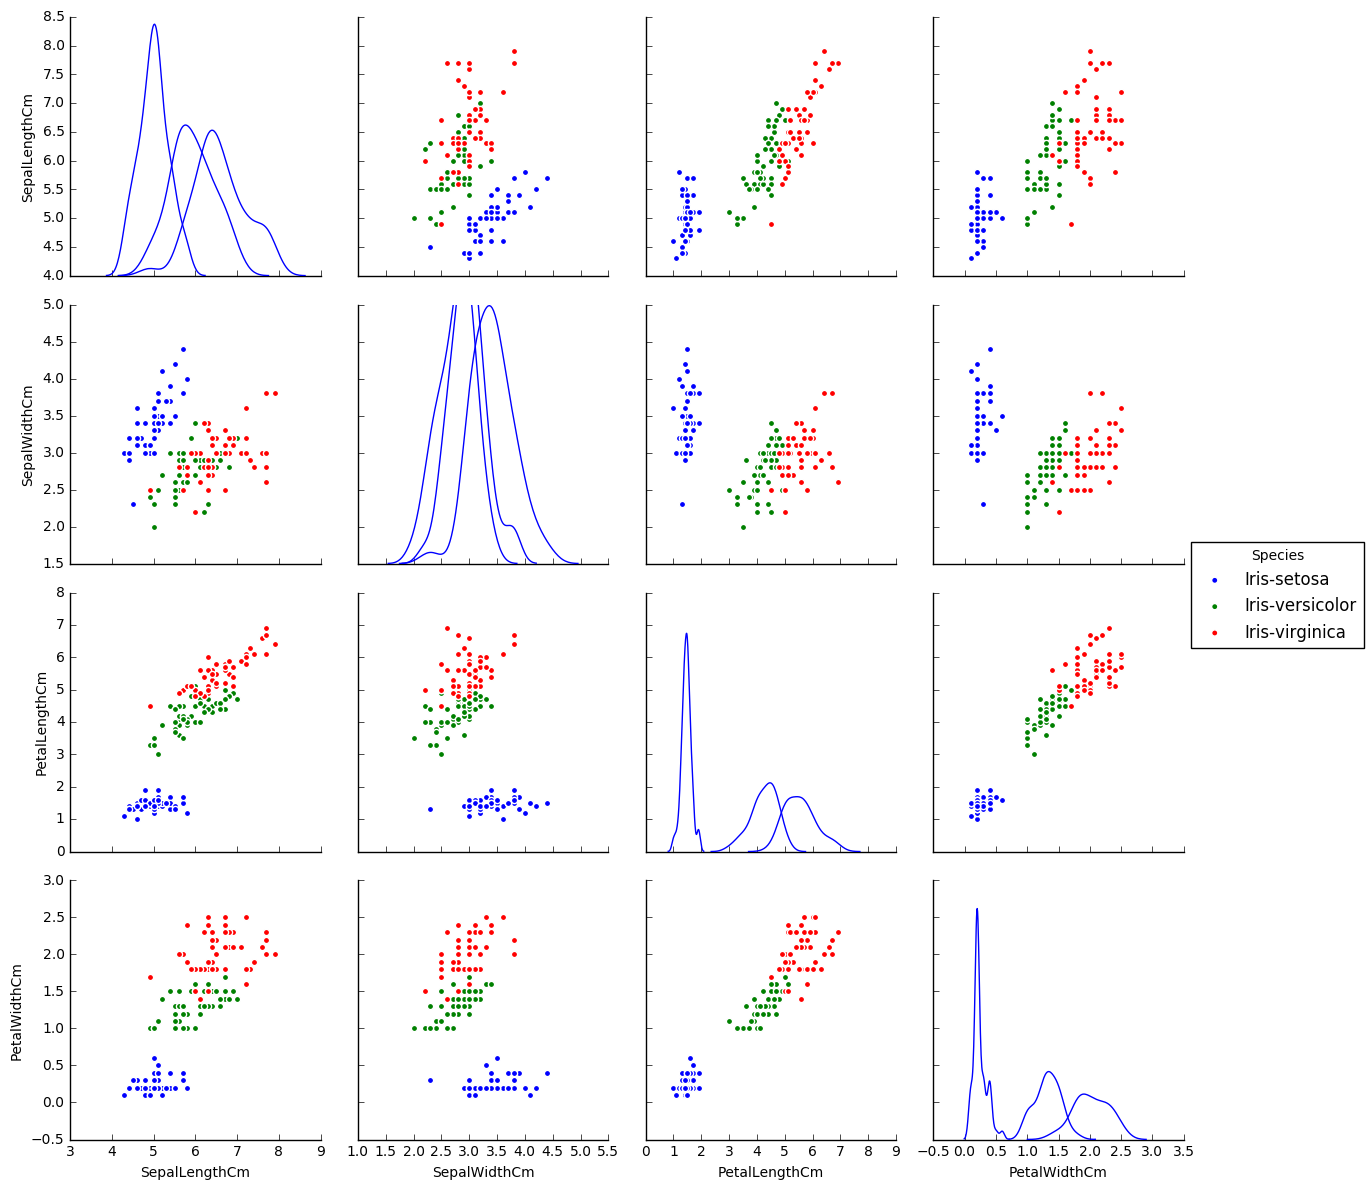

In [8]:
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde");

This scatter matrix shows that there are clear groupings between the species

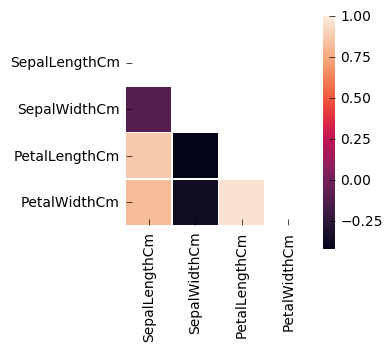

In [9]:
corr = iris.corr()
fg, ax = plt.subplots(figsize = (3,3))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

p = sns.heatmap(corr, mask = mask, linewidths = .5, square = True);

There are strong correlations between some of the variables, in real projects, highly correlated variables should be removed

In [10]:
from sklearn.model_selection import train_test_split

X will be our features and y will be our target variable

In [11]:
feats = list(iris.columns)
feats.remove('Species')

X = iris[feats]
y = iris.Species

**Training and Testing set Partition**

We split the features and target into a training and testing set using 30% of the data as the testing set

You can adjust the sizes by changing the 'test_size' input

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.head(), y_train.head()

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 60             5.0           2.0            3.5           1.0
 116            6.5           3.0            5.5           1.8
 144            6.7           3.3            5.7           2.5
 119            6.0           2.2            5.0           1.5
 108            6.7           2.5            5.8           1.8,
 60     Iris-versicolor
 116     Iris-virginica
 144     Iris-virginica
 119     Iris-virginica
 108     Iris-virginica
 Name: Species, dtype: object)

**Machine Learning Models**

![alt text](flow.png "flow.png")

In [14]:
from sklearn.metrics import *

In [15]:
m_eval = pd.DataFrame(columns = ['method','trainscore','testscore','True Positive','True Negative'])

In [16]:
def addeval(method, train, test, tpos, tneg):
    global m_eval
    d = pd.DataFrame([[method, train, test, tpos, tneg]],columns = ['method','trainscore','testscore','True Positive','True Negative'])
    m_eval = m_eval.append(d)

Let's start with applying a support vector machine classifier to the data

In [17]:
from sklearn.svm import SVC

0.980952380952 0.977777777778 0.0031746031746


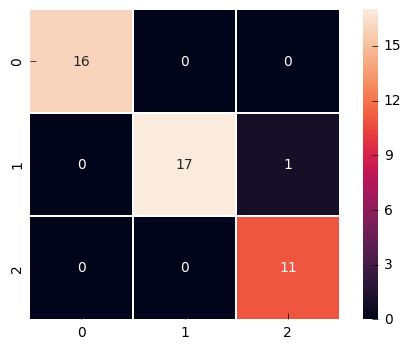

In [18]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = SVC(kernel = 'poly',C=100, gamma=0.01, probability = True)

#fit the model to the training data
svc.fit(X_train, y_train)

#predict the values using the testing data
svc_pred = svc.predict(X_test)
#display the accuracy or the training set, the testing set and the difference (to see if it is overfitting)
print(svc.score(X_train,y_train), svc.score(X_test, y_test),svc.score(X_train,y_train)-svc.score(X_test,y_test))

#display the confusion matrix for the test set
mtrx = confusion_matrix(y_test,svc_pred)

#add metrics to table
addeval('SVM',svc.score(X_train,y_train), svc.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

In [19]:
from sklearn.linear_model import LogisticRegression

0.942857142857 0.888888888889 0.0539682539683


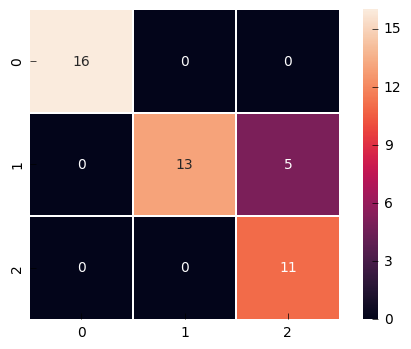

In [20]:
lr = LogisticRegression(penalty = 'l2', dual = True)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(lr.score(X_train,y_train), lr.score(X_test, y_test),lr.score(X_train,y_train)-lr.score(X_test,y_test))

mtrx = confusion_matrix(y_test,lr_pred)

addeval('Log Reg',lr.score(X_train,y_train), lr.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

For neural networks, it is a good idea to scale the data before training

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [22]:
scaler = StandardScaler() 

scaler.fit(X_train)  
sX_train = scaler.transform(X_train)  

sX_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

0.942857142857 0.955555555556 -0.0126984126984


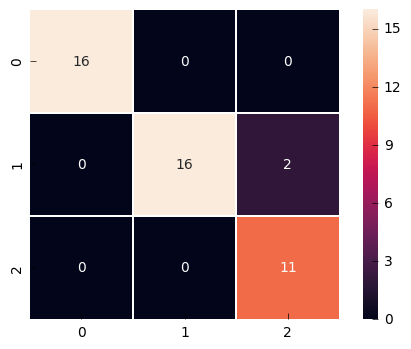

In [24]:
knn = KNeighborsClassifier(n_neighbors = 30, algorithm = 'auto', weights = 'uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_train,y_train), knn.score(X_test,y_test), knn.score(X_train,y_train)-knn.score(X_test,y_test))

mtrx = confusion_matrix(y_test,knn_pred)

addeval('KNN',knn.score(X_train,y_train), knn.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

In [25]:
from sklearn.naive_bayes import GaussianNB

0.942857142857 1.0 -0.0571428571429


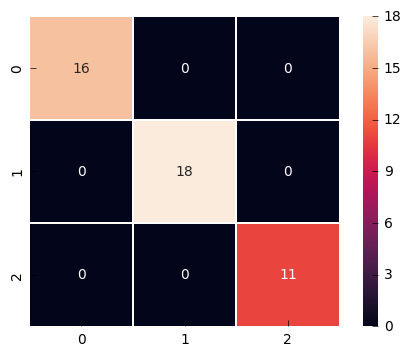

In [26]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
gauss_pred = gauss.predict(X_test)
print(gauss.score(X_train,y_train), gauss.score(X_test,y_test), gauss.score(X_train,y_train)-gauss.score(X_test,y_test))

mtrx = confusion_matrix(y_test,gauss_pred)

addeval('GaussNB',gauss.score(X_train,y_train), gauss.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

In [27]:
from sklearn.tree import DecisionTreeClassifier

1.0 0.977777777778 0.0222222222222


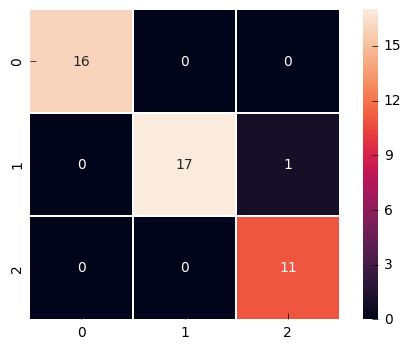

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(dt.score(X_train,y_train), dt.score(X_test,y_test), dt.score(X_train,y_train)-dt.score(X_test,y_test))

mtrx = confusion_matrix(y_test,dt_pred)

addeval('Dec Tree',dt.score(X_train,y_train), dt.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

**Benefits of Deep Learning**

This section will show how adding hidden layers to a neural network (Deep Learning) can improve the accuracy of the model

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.371428571429 0.244444444444 0.126984126984


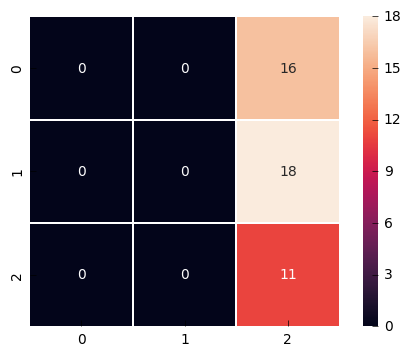

In [29]:
#No hidden layer, low accuracy

nn = MLPClassifier(hidden_layer_sizes=(1, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

#addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.866666666667 0.8 0.0666666666667


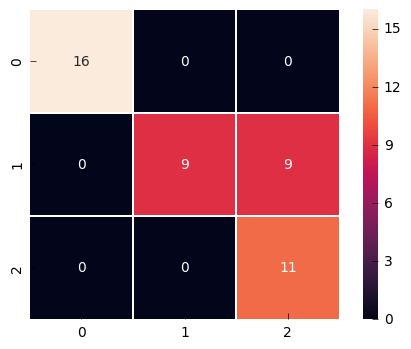

In [30]:
#50 hidden layers, 80% accuracy

nn = MLPClassifier(hidden_layer_sizes=(50, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

#addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.895238095238 0.888888888889 0.00634920634921


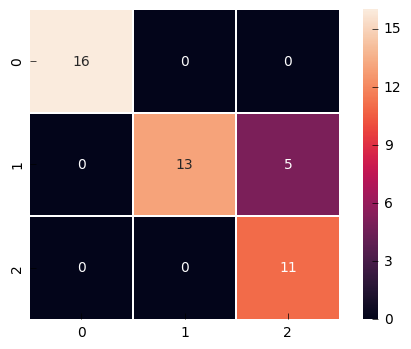

In [31]:
#100 hidden layers, 88% accuracy, less overfitting

nn = MLPClassifier(hidden_layer_sizes=(100, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

#addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.952380952381 0.933333333333 0.0190476190476


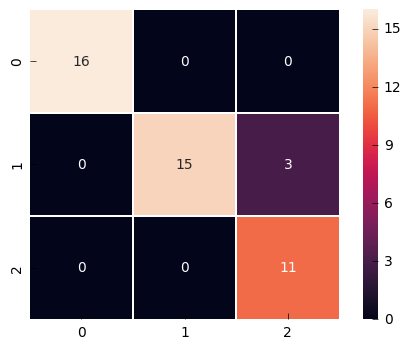

In [32]:
#200 hidden layers, 93% accuracy

nn = MLPClassifier(hidden_layer_sizes=(200, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

#addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.952380952381 0.955555555556 -0.0031746031746


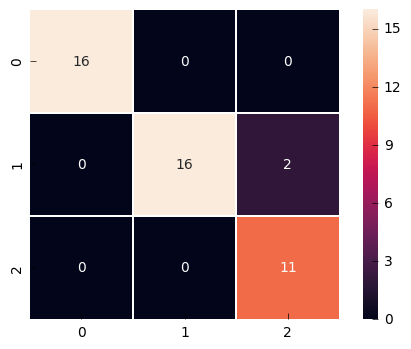

In [33]:
#300 hidden layers, 95% accuracy

nn = MLPClassifier(hidden_layer_sizes=(300, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

#addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

C:\Users\Travis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.971428571429 0.977777777778 -0.00634920634921


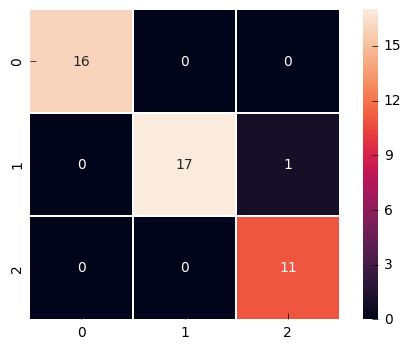

In [34]:
#400 hidden layers, 97% accuracy

nn = MLPClassifier(hidden_layer_sizes=(400, ),solver='adam', activation = 'logistic', random_state=1)

nn.fit(sX_train,y_train)
nn_pred = nn.predict(sX_test)
print(nn.score(sX_train,y_train), nn.score(sX_test,y_test), nn.score(sX_train,y_train)-nn.score(sX_test,y_test))

mtrx = confusion_matrix(y_test,nn_pred)

addeval('Neural Net',nn.score(sX_train,y_train), nn.score(sX_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

In [35]:
from sklearn.ensemble import VotingClassifier

1.0 0.977777777778 0.0222222222222


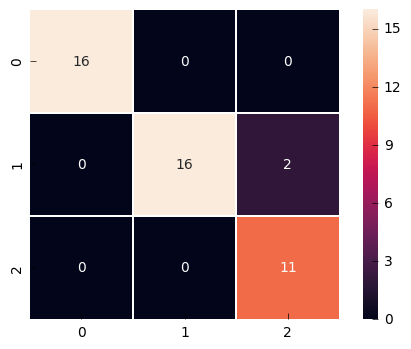

In [36]:
ens = VotingClassifier(estimators=[('SVC', svc), ('NB', gauss), ('dt',dt)], 
                       voting='soft', weights=[1,1,1])
ens.fit(X_train, y_train)
ens_pred = knn.predict(X_test)
print(ens.score(X_train,y_train), ens.score(X_test,y_test), ens.score(X_train,y_train)-ens.score(X_test,y_test))

mtrx = confusion_matrix(y_test,ens_pred)

addeval('Ensemble',ens.score(X_train,y_train), ens.score(X_test, y_test),mtrx[1,1],mtrx[0,0])

sns.heatmap(mtrx, linewidths = .5, square = True, annot=True);

In [37]:
mm_eval = pd.melt(m_eval[['method','trainscore','testscore']], "method", var_name="Measurement")
m_eval

,method,trainscore,testscore,True Positive,True Negative
0,SVM,0.980952,0.977778,17.0,16.0
0,Log Reg,0.942857,0.888889,13.0,16.0
0,KNN,0.942857,0.955556,16.0,16.0
0,GaussNB,0.942857,1.000000,18.0,16.0
0,Dec Tree,1.000000,0.977778,17.0,16.0
0,Neural Net,0.971429,0.977778,17.0,16.0
0,Ensemble,1.000000,0.977778,16.0,16.0


The top performing models were SVM, Naive Bayes, and Decision Tree

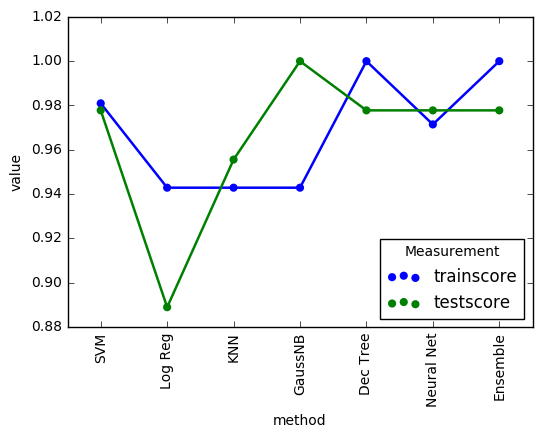

In [38]:
p = sns.pointplot(x="method", y="value", hue="Measurement", data=mm_eval)
labs = list(m_eval['method'])
p.set_xticklabels(labs, rotation=90);

**PCA Decomposition**

In [39]:
from sklearn.decomposition import PCA

In [40]:
#PCA can be used to decompose correlated fields into one field
#n_components is the number of output fields the function will return
#Always fit it to the training set then apply that to the testing set

pca = PCA(n_components=2)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [41]:
temp = pd.DataFrame(pca_X_train)
temp['y'] = y_train

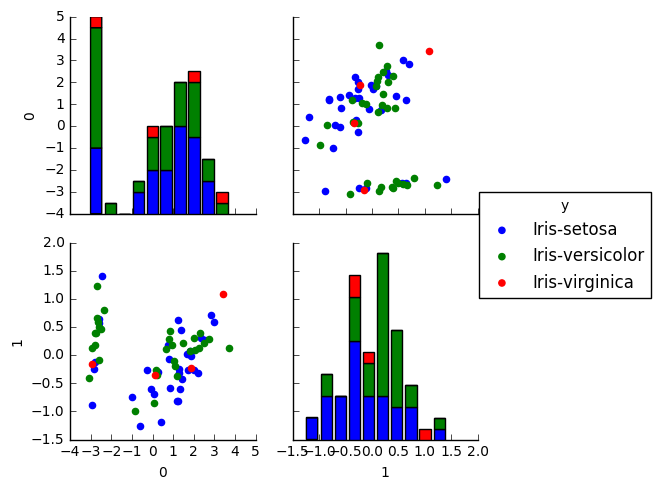

In [42]:
g = sns.PairGrid(temp, hue="y")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()